In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "cyclistic-bike-share-2020-dataset"

## Overview

Cyclistic, a prominent bike-share company headquartered in Chicago, has rapidly gained traction in the city's transportation landscape. In an effort to delve deeper into their customer base and refine their marketing strategies, Cyclistic seeks to understand the distinct behaviors and preferences of casual riders versus annual members.

The company recognizes the need to tailor its marketing approach to effectively convert casual riders into committed annual members. By leveraging data-driven insights, Cyclistic aims to develop a comprehensive understanding of how these two customer segments interact with their services differently.

**Business Task**

The objective of this business task is to develop a comprehensive marketing strategy for Cyclistic that addresses the distinct needs and behaviors of both annual members and casual riders. By answering the following three questions, we aim to optimize marketing efforts, increase customer engagement, and drive conversions from casual riders to annual members.

-   ***Understanding Usage Patterns***: Analyze Cyclistic's dataset to identify differences in how annual members and casual riders utilize Cyclistic bikes.

**Data Background**

The dataset was acquired from [Link](https://divvytripdata.s3.amazonaws.com/index.html) 
*Motivate International Inc* made the data available under this [license](https://divvybikes.com/data-license-agreement).

For this project, I downloaded data for twelve months (January to December 2020). The zipped CSVs were downloaded and unzipped into a folder.

Below shown the dataset of a *cyclistic biketrip data for the year 2020*.The dataset has *3541683* rows and *13* column.

Due to the large size of data we use *R* to analyse effectively.

## R Programming

-   ***Loading Packages*** The R package is a collection of R functions, data sets, and compiled code that extends the functionality of R. Here we use four packages to analyse the data.



In R, the *library()* function is used to load R packages into your current R session


In [2]:
library (tidyverse)
library (janitor)
library (lubridate)
library (scales)
library(geosphere)
rm(list=ls())


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




-   **Read CSV file**

Below given are the year ***2020 dataset** of cyclistic bike share program* which are downloaded and saved as CSV files. Here ***read.csv()*** is used for reading the csv files.

In [3]:
df1 <- read.csv("/kaggle/input/cyclistic-bike-share-2020-dataset/Divvy_Trips_2020_Q1.csv")
df2 <-  read.csv("/kaggle/input/cyclistic-bike-share-2020-dataset/202004-divvy-tripdata.csv")
df3 <- read.csv("/kaggle/input/cyclistic-bike-share-2020-dataset/202005-divvy-tripdata.csv")
df4 <- read.csv("/kaggle/input/cyclistic-bike-share-2020-dataset/202006-divvy-tripdata.csv")
df5 <- read.csv("/kaggle/input/cyclistic-bike-share-2020-dataset/202007-divvy-tripdata.csv")
df6 <- read.csv("/kaggle/input/cyclistic-bike-share-2020-dataset/202008-divvy-tripdata.csv")
df7 <- read.csv("/kaggle/input/cyclistic-bike-share-2020-dataset/202009-divvy-tripdata.csv")
df8 <- read.csv("/kaggle/input/cyclistic-bike-share-2020-dataset/202010-divvy-tripdata.csv")
df9 <- read.csv("/kaggle/input/cyclistic-bike-share-2020-dataset/202011-divvy-tripdata.csv")
df10 <- read.csv("/kaggle/input/cyclistic-bike-share-2020-dataset/202012-divvy-tripdata.csv")
df20 <- rbind(df1,df2,df3,df4,df5,df6,df7,df8,df9,df10)


In R, the ***head()*** function is used to view the first few rows of a data frame or a matrix. It allows you to quickly inspect the structure and content of your data without displaying the entire dataset.


In [4]:
head(df20)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326,41.9665,-87.6884,41.9671,-87.6674,member
2,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318,41.9616,-87.6660,41.9542,-87.6644,member
3,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117,41.9401,-87.6455,41.9402,-87.6530,member
4,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24,41.8846,-87.6319,41.8918,-87.6206,member
5,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212,41.8856,-87.6418,41.8899,-87.6343,member
6,6D9C8A6938165C11,docked_bike,2020-01-10 12:33:05,2020-01-10 12:37:54,Wells St & Hubbard St,212,Desplaines St & Randolph St,96,41.8899,-87.6343,41.8846,-87.6446,member


-   **Cleaning Data**

***Janitor*** is an R package that provides a set of functions to clean and preprocess data in R data frames


In [5]:
df20_cleanedcols <- janitor::remove_empty(df20,which =c("cols"))
df20_cleanedrows <- janitor::remove_empty(df20,which =c("rows"))
dim(df20_cleanedcols)
dim(df20_cleanedrows)

[1] 3541683      13

[1] 3541683      13

-   **Removing duplicates and NA values**

In [6]:
#removing NA 
df20_clean <- na.omit(df20)
sum(is.na(df20_clean))


[1] 0

In [7]:

# for unique and removing duplicates 
unique(df20_clean)

df20_clean <- df20_clean %>% filter(df20_clean$start_station_name!=" ")
glimpse(df20_clean)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326,41.9665,-87.6884,41.9671,-87.6674,member
2,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318,41.9616,-87.6660,41.9542,-87.6644,member
3,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117,41.9401,-87.6455,41.9402,-87.6530,member
4,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24,41.8846,-87.6319,41.8918,-87.6206,member
5,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212,41.8856,-87.6418,41.8899,-87.6343,member
6,6D9C8A6938165C11,docked_bike,2020-01-10 12:33:05,2020-01-10 12:37:54,Wells St & Hubbard St,212,Desplaines St & Randolph St,96,41.8899,-87.6343,41.8846,-87.6446,member
7,31EB9B8F406D4C82,docked_bike,2020-01-10 13:07:35,2020-01-10 13:12:24,Desplaines St & Randolph St,96,Wells St & Hubbard St,212,41.8846,-87.6446,41.8899,-87.6343,member
8,A2B24E3F9C9720E3,docked_bike,2020-01-10 07:24:53,2020-01-10 07:29:50,Desplaines St & Randolph St,96,Wells St & Hubbard St,212,41.8846,-87.6446,41.8899,-87.6343,member
9,5E3F01E1441730B7,docked_bike,2020-01-31 16:37:16,2020-01-31 16:42:11,Wells St & Hubbard St,212,Desplaines St & Randolph St,96,41.8899,-87.6343,41.8846,-87.6446,member


Rows: 3,406,932
Columns: 13
$ ride_id            <chr> "EACB19130B0CDA4A", "8FED874C809DC021", "789F3C21E4…
$ rideable_type      <chr> "docked_bike", "docked_bike", "docked_bike", "docke…
$ started_at         <chr> "2020-01-21 20:06:59", "2020-01-30 14:22:39", "2020…
$ ended_at           <chr> "2020-01-21 20:14:30", "2020-01-30 14:26:22", "2020…
$ start_station_name <chr> "Western Ave & Leland Ave", "Clark St & Montrose Av…
$ start_station_id   <chr> "239", "234", "296", "51", "66", "212", "96", "96",…
$ end_station_name   <chr> "Clark St & Leland Ave", "Southport Ave & Irving Pa…
$ end_station_id     <chr> "326", "318", "117", "24", "212", "96", "212", "212…
$ start_lat          <dbl> 41.9665, 41.9616, 41.9401, 41.8846, 41.8856, 41.889…
$ start_lng          <dbl> -87.6884, -87.6660, -87.6455, -87.6319, -87.6418, -…
$ end_lat            <dbl> 41.9671, 41.9542, 41.9402, 41.8918, 41.8899, 41.884…
$ end_lng            <dbl> -87.6674, -87.6644, -87.6530, -87.6206, -87.6343, -…
$ member_cas

-   **Organising Data**

*Lubridate* is an R package designed to make it easier to work with dates and times in R. It provides a set of functions that simplify common tasks such as parsing, manipulating, and formatting dates and times.we use parse date *ymd_hms()* and *as.Date()* for changing the Started_at and ended_at column format.


***Difftime()*** is used for calculating the difference in time. This helps us to find and analyse the duration of each ride.

In [8]:
df <- df20_clean 

df$started_date <- as.Date(df$started_at)
df$ended_date <- as.Date(df$ended_at)
#time as  hours and minutes
df$started_at <- lubridate::ymd_hms(df$started_at)
df$ended_at <- lubridate::ymd_hms(df$ended_at)
df$Start_time <- format(df$started_at,"%H:%M:%S")
df$End_time <- format(df$ended_at,"%H:%M:%S")
df$day_of_the_week <- weekdays(df$started_at)
df$month <- month(df$started_at, label = TRUE, abbr = TRUE)

df$trip_duration <- (as.double(difftime(df$ended_at,df$started_at)))/60

df<-df %>% 
  filter(trip_duration > 0)

glimpse(df)  

Rows: 3,395,919
Columns: 20
$ ride_id            <chr> "EACB19130B0CDA4A", "8FED874C809DC021", "789F3C21E4…
$ rideable_type      <chr> "docked_bike", "docked_bike", "docked_bike", "docke…
$ started_at         <dttm> 2020-01-21 20:06:59, 2020-01-30 14:22:39, 2020-01-…
$ ended_at           <dttm> 2020-01-21 20:14:30, 2020-01-30 14:26:22, 2020-01-…
$ start_station_name <chr> "Western Ave & Leland Ave", "Clark St & Montrose Av…
$ start_station_id   <chr> "239", "234", "296", "51", "66", "212", "96", "96",…
$ end_station_name   <chr> "Clark St & Leland Ave", "Southport Ave & Irving Pa…
$ end_station_id     <chr> "326", "318", "117", "24", "212", "96", "212", "212…
$ start_lat          <dbl> 41.9665, 41.9616, 41.9401, 41.8846, 41.8856, 41.889…
$ start_lng          <dbl> -87.6884, -87.6660, -87.6455, -87.6319, -87.6418, -…
$ end_lat            <dbl> 41.9671, 41.9542, 41.9402, 41.8918, 41.8899, 41.884…
$ end_lng            <dbl> -87.6674, -87.6644, -87.6530, -87.6206, -87.6343, -…
$ member_cas

The **distHaversine function**in R, from the geosphere package, is used
to calculate the great-circle distance between two points on the Earth's
surface given their latitude and longitude coordinates. This distance is
calculated using the Haversine formula, which accounts for the spherical
shape of the Earth.

In [9]:
# Distance Calculation using distHaversine function

df$distance <- mapply(function(lat1, lon1, lat2, lon2) {
  distHaversine(c(lon1, lat1), c(lon2, lat2))
}, df$start_lat, df$start_lng, df$end_lat, df$end_lng)

#change to km
df$distance <- df$distance/1000

glimpse(df)

Rows: 3,395,919
Columns: 21
$ ride_id            <chr> "EACB19130B0CDA4A", "8FED874C809DC021", "789F3C21E4…
$ rideable_type      <chr> "docked_bike", "docked_bike", "docked_bike", "docke…
$ started_at         <dttm> 2020-01-21 20:06:59, 2020-01-30 14:22:39, 2020-01-…
$ ended_at           <dttm> 2020-01-21 20:14:30, 2020-01-30 14:26:22, 2020-01-…
$ start_station_name <chr> "Western Ave & Leland Ave", "Clark St & Montrose Av…
$ start_station_id   <chr> "239", "234", "296", "51", "66", "212", "96", "96",…
$ end_station_name   <chr> "Clark St & Leland Ave", "Southport Ave & Irving Pa…
$ end_station_id     <chr> "326", "318", "117", "24", "212", "96", "212", "212…
$ start_lat          <dbl> 41.9665, 41.9616, 41.9401, 41.8846, 41.8856, 41.889…
$ start_lng          <dbl> -87.6884, -87.6660, -87.6455, -87.6319, -87.6418, -…
$ end_lat            <dbl> 41.9671, 41.9542, 41.9402, 41.8918, 41.8899, 41.884…
$ end_lng            <dbl> -87.6674, -87.6644, -87.6530, -87.6206, -87.6343, -…
$ member_cas

-   **Summarize the data**


In [10]:
## summary of the dataframe by removing unnecessary column
df <- df %>% 
  select(-start_station_id,-end_station_id,-start_lat,-end_lat,-start_lng,-end_lng)
glimpse(df)



Rows: 3,395,919
Columns: 15
$ ride_id            <chr> "EACB19130B0CDA4A", "8FED874C809DC021", "789F3C21E4…
$ rideable_type      <chr> "docked_bike", "docked_bike", "docked_bike", "docke…
$ started_at         <dttm> 2020-01-21 20:06:59, 2020-01-30 14:22:39, 2020-01-…
$ ended_at           <dttm> 2020-01-21 20:14:30, 2020-01-30 14:26:22, 2020-01-…
$ start_station_name <chr> "Western Ave & Leland Ave", "Clark St & Montrose Av…
$ end_station_name   <chr> "Clark St & Leland Ave", "Southport Ave & Irving Pa…
$ member_casual      <chr> "member", "member", "member", "member", "member", "…
$ started_date       <date> 2020-01-21, 2020-01-30, 2020-01-09, 2020-01-06, 20…
$ ended_date         <date> 2020-01-21, 2020-01-30, 2020-01-09, 2020-01-06, 20…
$ Start_time         <chr> "20:06:59", "14:22:39", "19:29:26", "16:17:07", "08…
$ End_time           <chr> "20:14:30", "14:26:22", "19:32:17", "16:25:56", "08…
$ day_of_the_week    <chr> "Tuesday", "Thursday", "Thursday", "Monday", "Thurs…
$ month     

In [11]:
summary(df)

   ride_id          rideable_type        started_at                 
 Length:3395919     Length:3395919     Min.   :2020-01-01 00:04:44  
 Class :character   Class :character   1st Qu.:2020-06-16 00:03:06  
 Mode  :character   Mode  :character   Median :2020-08-06 17:05:04  
                                       Mean   :2020-07-25 22:27:46  
                                       3rd Qu.:2020-09-21 15:42:09  
                                       Max.   :2020-12-31 23:59:59  
                                                                    
    ended_at                   start_station_name end_station_name  
 Min.   :2020-01-01 00:10:54   Length:3395919     Length:3395919    
 1st Qu.:2020-06-16 01:54:53   Class :character   Class :character  
 Median :2020-08-06 17:27:33   Mode  :character   Mode  :character  
 Mean   :2020-07-25 22:55:44                                        
 3rd Qu.:2020-09-21 16:06:45                                        
 Max.   :2021-01-03 08:54:11      

In [12]:
##calculate riable_type usage
sum_df <- df %>% 
  select(rideable_type,member_casual,started_at,start_station_name,day_of_the_week,month,trip_duration,distance) %>% 
  group_by(rideable_type,member_casual) %>% 
  summarise(Total_Duration = sum(trip_duration),Count = n(),Total_distance = sum(distance)) %>% 
  ungroup()

glimpse(sum_df)
  

`summarise()` has grouped output by 'rideable_type'. You can override using the
`.groups` argument.


Rows: 6
Columns: 5
$ rideable_type  <chr> "classic_bike", "classic_bike", "docked_bike", "docked_…
$ member_casual  <chr> "casual", "member", "casual", "member", "casual", "memb…
$ Total_Duration <dbl> 265619.2, 760908.7, 58895684.5, 29011077.5, 3145580.6, …
$ Count          <int> 11288, 59248, 1140595, 1810763, 150819, 223206
$ Total_distance <dbl> 22488.75, 112575.68, 2422406.88, 3948045.61, 375237.95,…


In [13]:
## member Vs Casual distribution
Member_type<- df %>% 
  group_by(member_casual) %>% 
  summarise(Count = n(),Total_duration = sum(trip_duration),Total_distance = sum(distance)) %>% 
  ungroup()
glimpse(Member_type)

Rows: 2
Columns: 4
$ member_casual  <chr> "casual", "member"
$ Count          <int> 1302702, 2093217
$ Total_duration <dbl> 62306884, 32696763
$ Total_distance <dbl> 2820134, 4628772


In [14]:
# Daily ride 
ride_per_day <- df %>% 
  group_by(started_date,member_casual) %>% 
  summarise(Avg_Trip = mean(trip_duration),Avg_distance = mean(distance),Count = n()) %>% 
  arrange(started_date) %>% 
  ungroup()


glimpse(ride_per_day)

`summarise()` has grouped output by 'started_date'. You can override using the
`.groups` argument.


Rows: 728
Columns: 5
$ started_date  <date> 2020-01-01, 2020-01-01, 2020-01-02, 2020-01-02, 2020-01…
$ member_casual <chr> "casual", "member", "casual", "member", "casual", "membe…
$ Avg_Trip      <dbl> 82.751572, 12.622806, 102.745953, 11.360752, 31.038227, …
$ Avg_distance  <dbl> 1.856419, 1.807829, 2.067135, 1.945271, 2.050374, 1.8494…
$ Count         <int> 477, 1664, 663, 5816, 453, 5437, 390, 2797, 431, 2604, 2…


In [15]:
## weekly ride
Weekly_ride <- df %>% 
  group_by(day_of_the_week,member_casual) %>% 
  summarise(Avg_Trip = mean(trip_duration),
            Avg_distance = mean(distance),Count = n()) %>% 
  arrange(day_of_the_week) %>% 
  ungroup()

glimpse(Weekly_ride)

`summarise()` has grouped output by 'day_of_the_week'. You can override using
the `.groups` argument.


Rows: 14
Columns: 5
$ day_of_the_week <chr> "Friday", "Friday", "Monday", "Monday", "Saturday", "S…
$ member_casual   <chr> "casual", "member", "casual", "member", "casual", "mem…
$ Avg_Trip        <dbl> 45.80408, 15.36075, 46.76557, 14.85248, 48.92809, 17.7…
$ Avg_distance    <dbl> 2.176301, 2.185371, 2.024796, 2.151873, 2.304364, 2.33…
$ Count           <int> 191934, 313158, 134652, 281589, 300367, 298968, 245914…


In [16]:
# monthly Ride
monthly_ride <- df %>% 
  group_by(month, member_casual) %>% 
  summarise(Avg_Trip = mean(trip_duration),
            Avg_distance = mean(distance),Count = n()) %>% 
  arrange(month) %>% 
  ungroup()


glimpse(monthly_ride)

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


Rows: 24
Columns: 5
$ month         <ord> Jan, Jan, Feb, Feb, Mar, Mar, Apr, Apr, May, May, Jun, J…
$ member_casual <chr> "casual", "member", "casual", "member", "casual", "membe…
$ Avg_Trip      <dbl> 161.64949, 11.14904, 127.63017, 12.80652, 63.12443, 14.3…
$ Avg_distance  <dbl> 1.944444, 1.783580, 1.955242, 1.768710, 1.962172, 1.9842…
$ Count         <int> 7785, 136099, 12860, 126715, 27625, 115593, 23566, 61054…


In [17]:
# Popular start station 
Popular_top_start_stations <- df %>%
  count(start_station_name) %>%
  arrange(desc(n)) %>% 
  head(10)

In [18]:
# Top 20 start station
top_start_stations <- df %>%
  group_by(start_station_name,member_casual) %>% 
  count(start_station_name) %>%
  arrange(desc(n)) %>% 
  head(20) %>% 
  ungroup()

In [19]:
#Top 20 end Station
  top_end_stations <- df %>%
  group_by(end_station_name,member_casual) %>% 
  count(end_station_name) %>%
  arrange(desc(n)) %>% 
  head(20) %>% 
 ungroup()

In [20]:
head(top_start_stations)
head(top_end_stations)

start_station_name,member_casual,n
<chr>,<chr>,<int>
Streeter Dr & Grand Ave,casual,25862
Clark St & Elm St,member,20219
Lake Shore Dr & Monroe St,casual,19893
Millennium Park,casual,18376
Kingsbury St & Kinzie St,member,16448
St. Clair St & Erie St,member,15825


end_station_name,member_casual,n
<chr>,<chr>,<int>
Streeter Dr & Grand Ave,casual,28465
Clark St & Elm St,member,20911
Millennium Park,casual,19421
Lake Shore Dr & Monroe St,casual,19254
St. Clair St & Erie St,member,17666
Kingsbury St & Kinzie St,member,16637


In [21]:
#  top station with large distance ride 
dis_df <- df %>% 
  group_by(start_station_name,member_casual) %>% 
  summarise(Avg_distance = mean(distance)) %>% 
  arrange(desc(Avg_distance)) %>% 
  head(20) %>% 
  ungroup()

head(dis_df)

`summarise()` has grouped output by 'start_station_name'. You can override
using the `.groups` argument.


start_station_name,member_casual,Avg_distance
<chr>,<chr>,<dbl>
Vincennes Ave & 104th St,member,7.194716
Dodge Ave & Main St,casual,6.869583
Michigan Ave & 71st St,member,6.645524
Ashland Ave & 74th St,member,6.077201
Stony Island Ave & 90th St,member,6.062735
Dauphin Ave & 103rd St,member,5.777185


In [22]:
#hourly Bike Demand

df <- df %>% 
  mutate(start_hour = lubridate::hour(started_at))

In [23]:
hourly_need <- df %>% 
 group_by(member_casual,start_hour) %>% 
  summarise(number_of_trips = n()) %>% 
  ungroup()

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


-   **Data Visualisation**

The *ggplot()* function is the primary function used in the ggplot2 package, a popular data visualization package in R. It is used to create and customize plots based on a grammar of graphics approach, allowing users to create complex and highly customizable visualizations with relatively simple syntax.

Here's how the ggplot() workes to calculate

**1. Member Vs Casual Distribution**


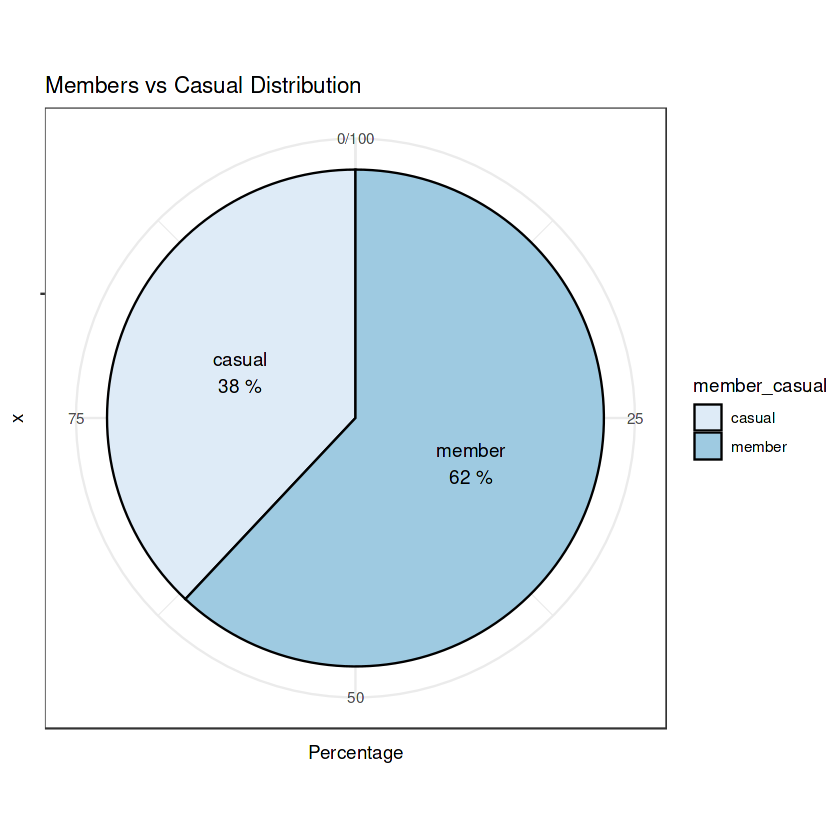

In [24]:
Member_type$Percentage <- round(Member_type$Count/sum(Member_type$Count)*100)

ggplot(Member_type,mapping = aes(x = " ", y = Percentage, fill = member_casual)) + 
    geom_col(color = "black") + 
    geom_text(aes(label=paste(member_casual, paste(Percentage,"%"),sep="\n")),     position = position_stack(vjust=0.5), color="black") +
  labs(title = "Members vs Casual Distribution") +
  coord_polar(theta = "y") +
  scale_fill_brewer() +
  theme_bw()

**2.Riders Bike type Usage**

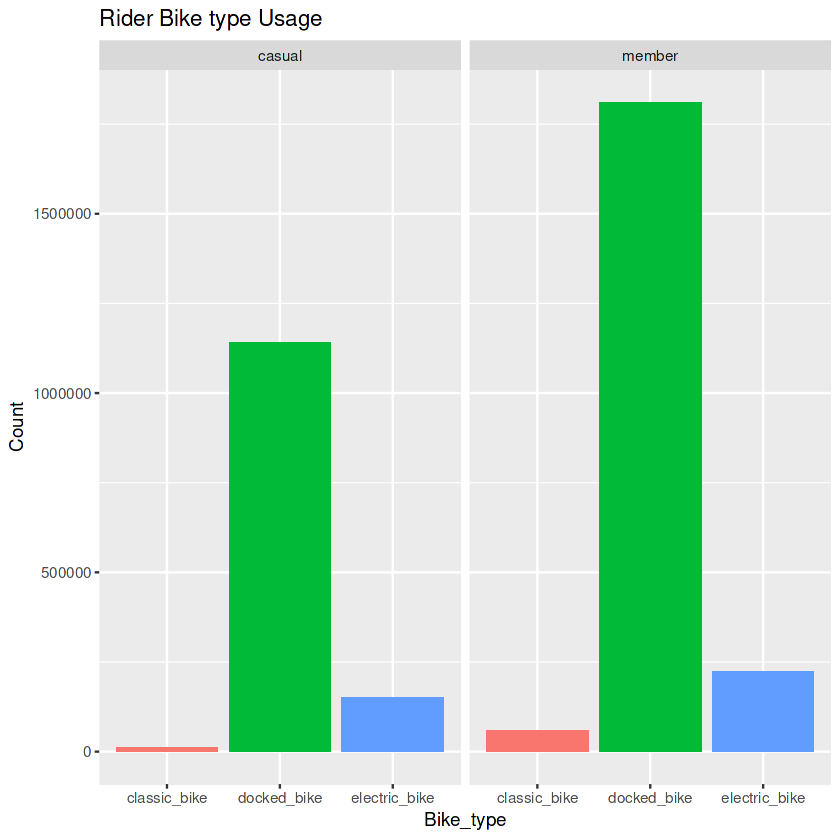

In [25]:
##Most used bike type 
 ggplot(sum_df,mapping = aes(x = rideable_type ,y = Count,fill = rideable_type)) +
  geom_bar(stat = "identity") +
  facet_wrap(~member_casual, nrow = 1) +
  theme(legend.position = "none") +
  labs(title = "Rider Bike type Usage",x = "Bike_type",y = "Count")


**3.Rides Done on Per Day**


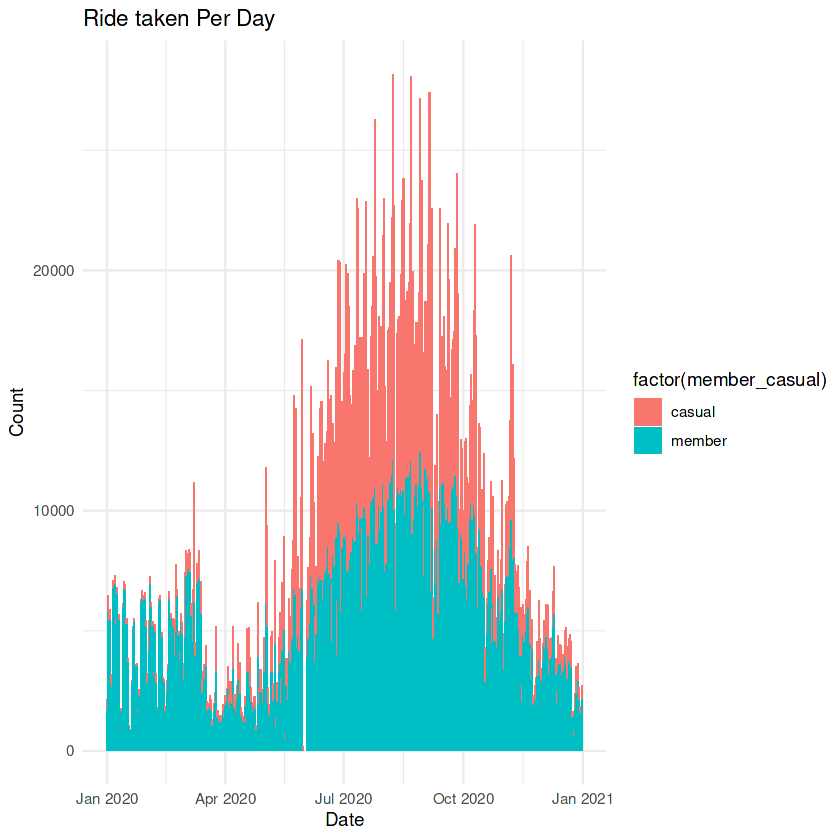

In [26]:
# Total Ride per day

ggplot(ride_per_day, aes(x = started_date, y = Count,fill = factor(member_casual))) +
  geom_col()+ labs( title  ="Ride taken Per Day",
       x = "Date",
       y = "Count") +
  theme_minimal()

**4.Weekly Ride Count**

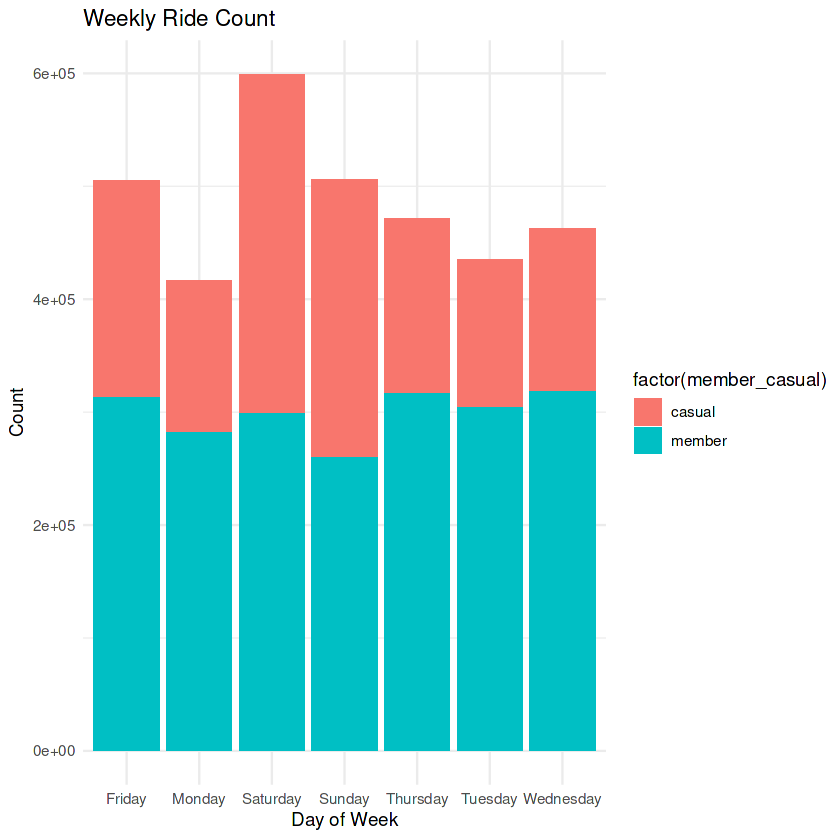

In [27]:
##Total Ride per Week

ggplot(Weekly_ride, aes(x = day_of_the_week, y = Count,fill = factor(member_casual))) +
  geom_col()+ labs( title  ="Weekly Ride Count",
       x = "Day of Week",
       y = "Count") +
  theme_minimal()

**5.Monthly Ride Count**

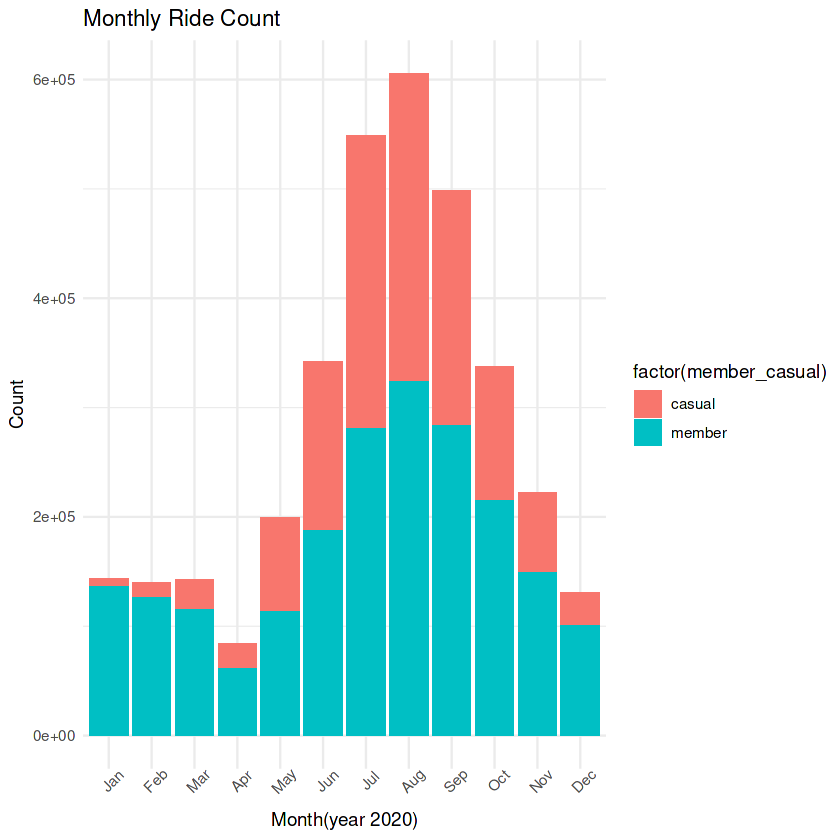

In [28]:
##Monthy Ride Count

ggplot(monthly_ride, aes(x = month, y = Count ,fill = factor(member_casual))) +
  geom_col()+ labs( title  ="Monthly Ride Count",
       x = "Month(year 2020)",
       y = "Count") +theme_minimal()+
  theme(axis.text.x = element_text(angle = 45))
  



**6. Average Distance Covered from Various Start Station**

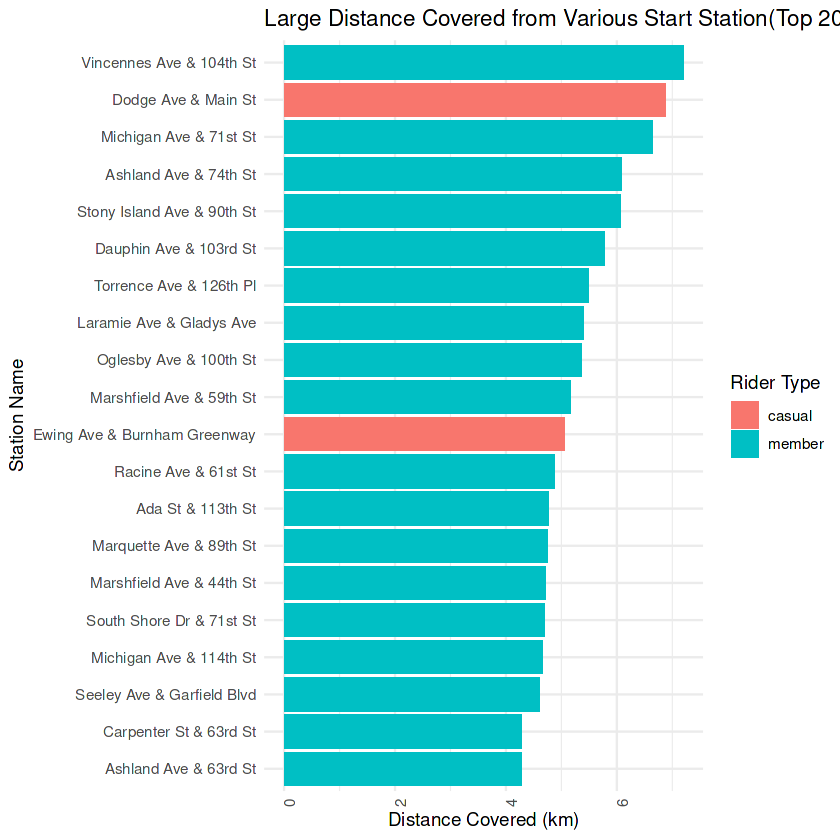

In [29]:
## Average Distance ride by member type in a year

ggplot(dis_df, aes(x = Avg_distance, y = reorder(start_station_name,Avg_distance), fill = factor(member_casual))) +
  geom_col() +
  labs(title = "Large Distance Covered from Various Start Station(Top 20)",
       x = "Distance Covered (km)",
       y = "Station Name",
       fill = "Rider Type") +
  theme_minimal()+
  theme(axis.text.x = element_text(angle = 90))
  

**7.Popular Start Station**

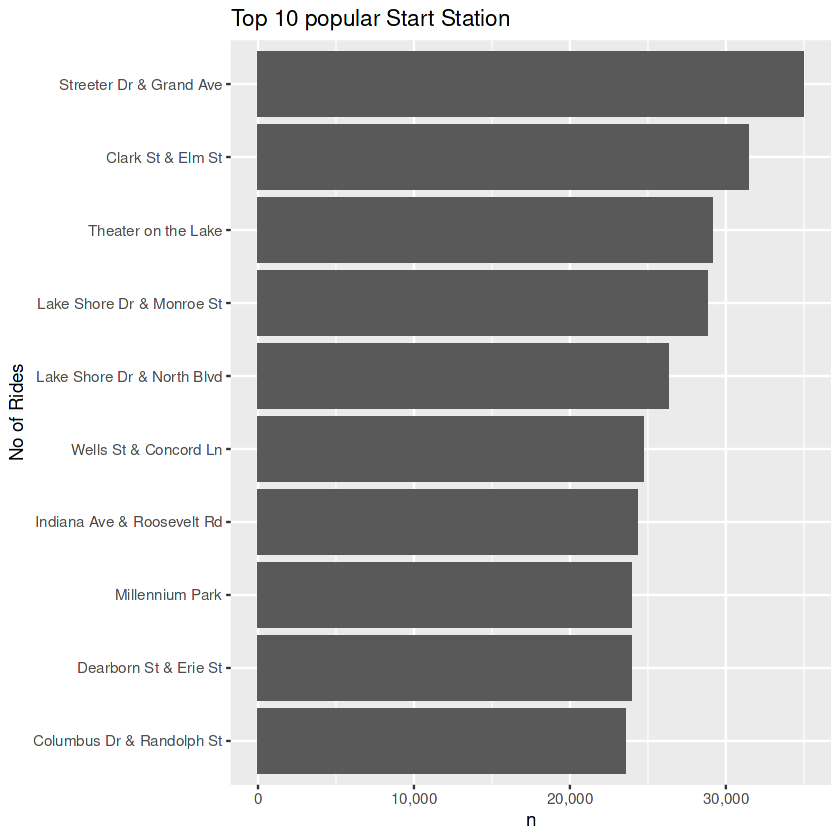

In [30]:
Popular_top_start_stations %>% 
ggplot() + geom_col(aes(x=n,y= reorder(start_station_name,n)))+ scale_x_continuous(labels = comma)+
  labs(title = "Top 10 popular Start Station", y = "No of Rides")


**8. Rider most preferred Stations**

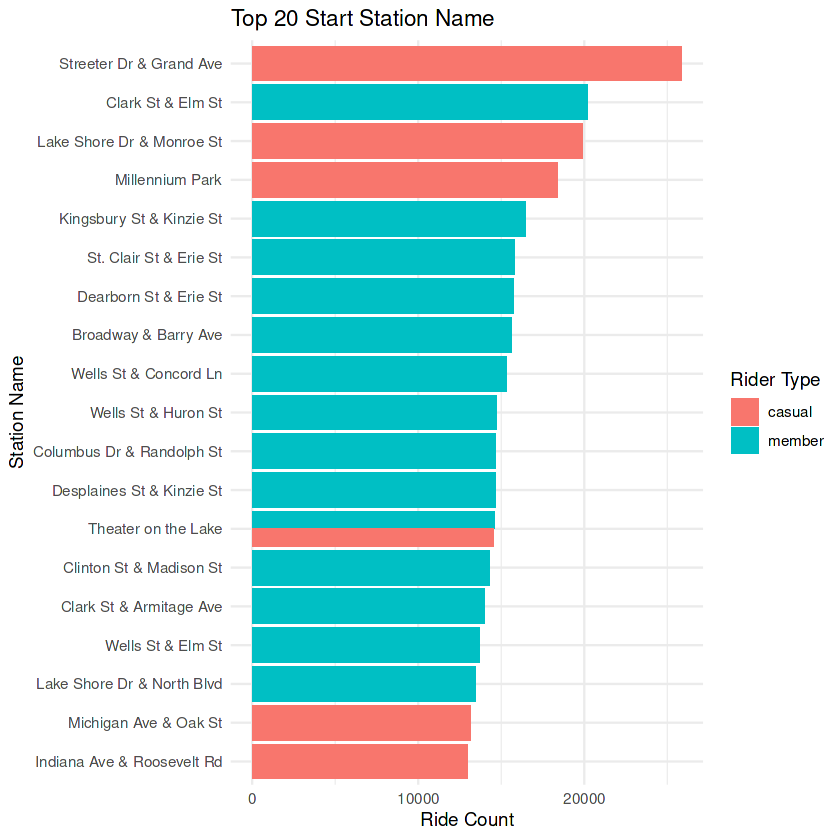

In [31]:
#Top Start Station Name

ggplot(top_start_stations, aes(x = n, y = reorder(start_station_name,n), fill = factor(member_casual))) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Top 20 Start Station Name",
       x = "Ride Count",
       y = "Station Name",
       fill = "Rider Type") +
  theme_minimal()

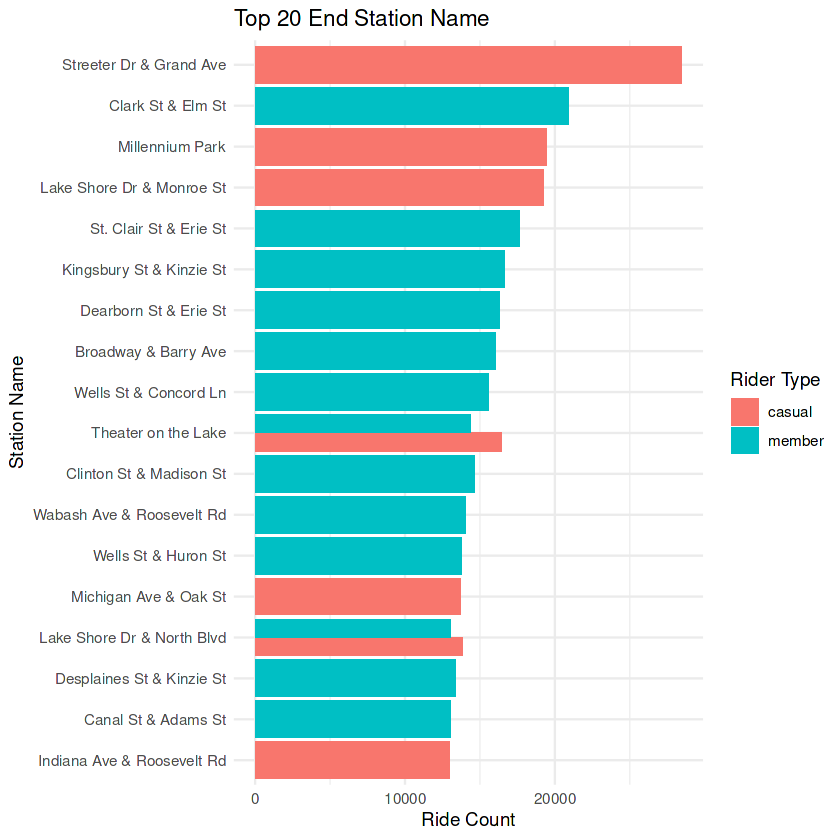

In [32]:
#Top End Station Name

ggplot(top_end_stations, aes(x = n, y = reorder(end_station_name,n), fill = factor(member_casual))) + 
  geom_bar(stat = "identity", position = "dodge") + 
  labs(title = "Top 20 End Station Name",
       x = "Ride Count",
       y = "Station Name",
       fill = "Rider Type") +
  theme_minimal()

**9.Hourly Bike Demand**

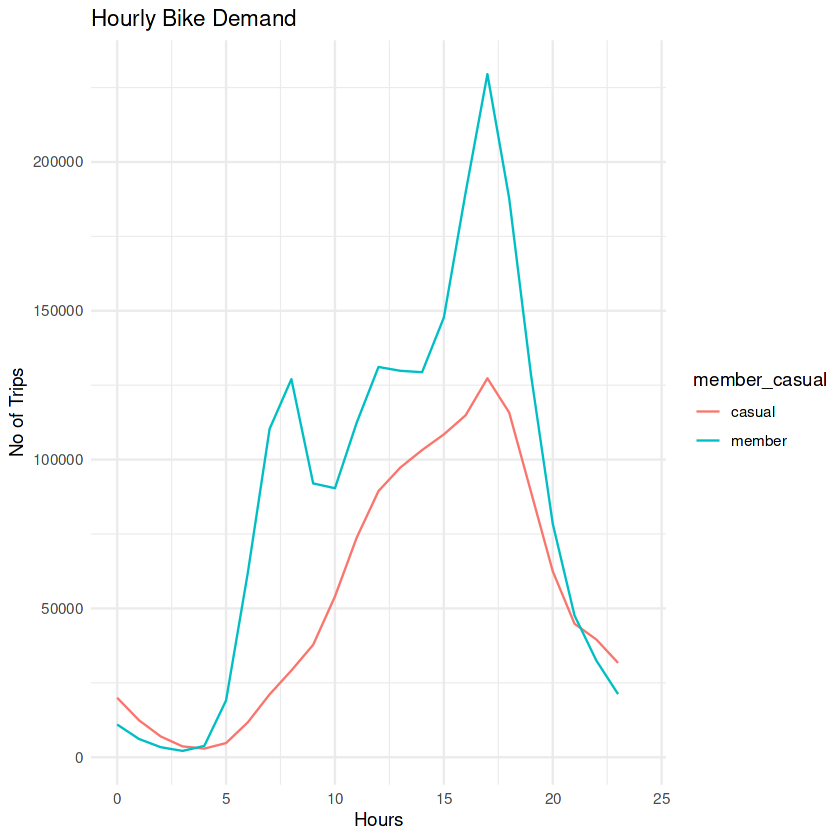

In [33]:
hourly_need %>% 
  ggplot()+geom_line(aes(x=start_hour,y= number_of_trips,color = member_casual))+
  labs(title = "Hourly Bike Demand",
       x = "Hour",
       y = "No of Trips",
       fill = "Member_casual") +
  scale_x_continuous(limits = c(0,24), name ="Hours")+
  theme_minimal()

## Recommendations for Stakeholders:

**1.Enhance Membership Programs:**

Since **62%\*** of the users are members, there is an opportunity to
further strengthen membership benefits to retain and attract more
long-term users. Consider offering loyalty programs, discounts for
long-term memberships, or exclusive benefits during peak seasons (April
to September).

**2.Bike Type Optimization:**

Given that both members and casual riders prefer **docked bikes**,
ensure that there are sufficient docked bikes available at high-demand
stations, especially during peak hours. Consider investing in more
docked bikes and maintaining a balance with other bike types.

**3.Seasonal Promotions:**

Since ride frequency increases from April and decreases after September,
plan for seasonal promotions and marketing campaigns to maximize
ridership during these months. This could include discounted rides,
special events, or partnerships with local businesses to encourage more
usage.

**4.Improve Weekend Services:**

With higher ride volumes on weekends, ensure there are adequate
resources and bike availability. Consider running special weekend events
or promotions to further boost ridership.

**5.Focus on High-Demand Stations:**

**Vincennes Ave & 104th Station** and **Streeter Dr & Grand Ave** are
key stations with high ride counts and distances covered. Enhance
services at these stations, such as better bike maintenance, increased
docking stations, and potentially setting up customer service points.

**6.Adjust for Peak Hours:**

With peak demand between **3 pm to 6 pm**, allocate more bikes and
ensure efficient redistribution of bikes to meet demand. Consider
offering incentives for riders who choose to ride outside of these peak
hours to balance the load.

## Recommendations for Marketing Team:

**1.Targeted Marketing Campaigns:**

Develop targeted campaigns to convert casual riders to members.
Highlight the benefits of membership, such as cost savings, exclusive
access to promotions, and convenience.

**2.Leverage Popular Stations:**

Use the popularity of stations like **Streeter Dr & Grand Ave** to
create event-based marketing. For instance, set up pop-up events, offer
free refreshments, or partner with nearby attractions to draw in more
riders.

**3.Promote During Peak Seasons:**

Utilize data showing increased rides from April to September to launch
time-limited offers and campaigns. Engage with riders through social
media, email newsletters, and local advertisements to promote these
offers.

**4.Weekend Specials:**

Since weekends see higher ridership, promote special weekend passes or
family packages to attract group rides. Collaborate with local tourist
attractions or restaurants to offer combined deals.

**5.Highlight Environmental Impact:**

Emphasize the environmental benefits of using bike share programs in
your marketing materials. Share statistics on carbon footprint reduction
and promote the sustainable aspect of biking to attract eco-conscious
riders.

**6.Dynamic Pricing:**

Implement dynamic pricing strategies during peak hours and seasons to
manage demand and encourage off-peak usage. Offer discounted rates for
rides starting early in the morning or late at night.

By addressing these, Cyclistic can enhance user experience, optimize
operations, and effectively increase ridership and membership.


